<a href="https://colab.research.google.com/github/whbello/Algoritmos-de-optimizaci-n/blob/main/Algoritmos_AG2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AG2 - Actividad Guiada 2
Nombre: Wilson Henry Bello V. <br>
Link:   https://drive.google.com/drive/folders/1pXG7o4RtxqaONwFa3zGyzJCySFHfHJM9?usp=sharing <br>
Github: https://github.com/whbello/Algoritmos-de-optimizaci-n.git
<br>




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import math



1.   Elemento de lista
2.   Elemento de lista



##Programación Dinámica. Viaje por el rio
* **Definición**: Es posible dividir el problema en subproblemas más pequeños, guardando las soluciones para ser utilizadas más adelante.
* **Características** que permiten identificar problemas aplicables:<br>
  -Es posible almacenar soluciones de los subproblemas para ser utilizados más adelante<br>
  -Debe verificar el principio de optimalidad de Bellman: “en una secuencia optima de decisiones, toda sub-secuencia también es óptima” (*)<br>
  -La necesidad de guardar la información acerca de las soluciones parciales unido a la recursividad provoca la necesidad de preocuparnos por la complejidad espacial (cuantos recursos de espacio usaremos)<br>

###Problema<br>
En un río hay **n** embarcaderos y debemos desplazarnos río abajo desde un embarcadero a otro. Cada embarcadero tiene precios diferentes para ir de un embarcadero a otro situado más abajo. Para ir del embarcadero i al j, puede ocurrir que sea más barato hacer un trasbordo por un embarcadero intermedio k. El problema consiste en determinar la combinación más barata.

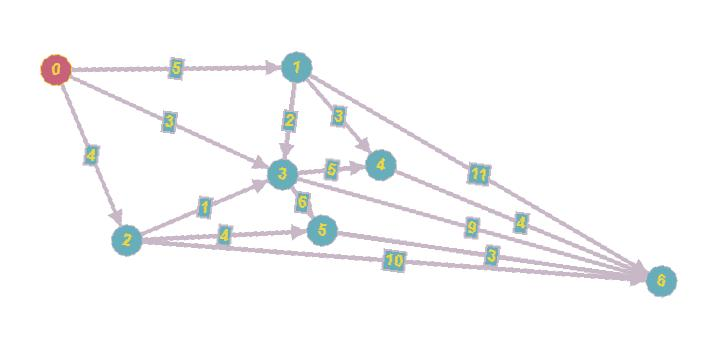

*Consideramos una tabla TARIFAS(i,j) para almacenar todos los precios que nos ofrecen los embarcaderos.<br>
*Si no es posible ir desde i a j daremos un valor alto para garantizar que ese trayecto no se va a elegir en la ruta óptima(modelado habitual para restricciones)

In [ ]:
#Viaje por el rio - Programación dinámica
################################################################################

TARIFAS = [
[0,5,4,3,float("inf"),999,999],   #desde nodo 0
[999,0,999,2,3,999,11],  #desde nodo 1
[999,999, 0,1,999,4,10], #desde nodo 2
[999,999,999, 0,5,6,9],
[999,999, 999,999,0,999,4],
[999,999, 999,999,999,0,3],
[999,999,999,999,999,999,0]
]

#999 se puede sustituir por float("inf") del modulo math
TARIFAS

[[0, 5, 4, 3, inf, 999, 999],
 [999, 0, 999, 2, 3, 999, 11],
 [999, 999, 0, 1, 999, 4, 10],
 [999, 999, 999, 0, 5, 6, 9],
 [999, 999, 999, 999, 0, 999, 4],
 [999, 999, 999, 999, 999, 0, 3],
 [999, 999, 999, 999, 999, 999, 0]]

In [ ]:
#Calculo de la matriz de PRECIOS y RUTAS
#  PRECIOS - contiene la matriz del mejor precio para ir de un nodo a otro
#  RUTAS   - contiene los nodos intermedios para ir de un nodo a otro
################################################################
def Precios(TARIFAS):
################################################################
  #Total de Nodos
  N = len(TARIFAS[0])

  #Inicialización de la tabla de precios
  PRECIOS = [ [9999]*N for i in [9999]*N]  #n x n
  RUTA = [ [""]*N for i in [""]*N]

  #Se recorren todos los nodos con dos bucles(origen - destino)
  #  para ir construyendo la matriz de PRECIOS
  for i in range(N-1):
    for j in range(i+1, N):
      MIN = TARIFAS[i][j]
      RUTA[i][j] = i

      for k in range(i, j):
        if PRECIOS[i][k] + TARIFAS[k][j] < MIN:
            MIN = min(MIN, PRECIOS[i][k] + TARIFAS[k][j] )
            RUTA[i][j] = k
        PRECIOS[i][j] = MIN

  return PRECIOS,RUTA

In [ ]:
PRECIOS,RUTA = Precios(TARIFAS)
#print(PRECIOS[0][6])

print("PRECIOS")
for i in range(len(TARIFAS)):
  print(PRECIOS[i])

print("\nRUTA")
for i in range(len(TARIFAS)):
  print(RUTA[i])

PRECIOS
[9999, 5, 4, 3, 8, 8, 11]
[9999, 9999, 999, 2, 3, 8, 7]
[9999, 9999, 9999, 1, 6, 4, 7]
[9999, 9999, 9999, 9999, 5, 6, 9]
[9999, 9999, 9999, 9999, 9999, 999, 4]
[9999, 9999, 9999, 9999, 9999, 9999, 3]
[9999, 9999, 9999, 9999, 9999, 9999, 9999]

RUTA
['', 0, 0, 0, 1, 2, 5]
['', '', 1, 1, 1, 3, 4]
['', '', '', 2, 3, 2, 5]
['', '', '', '', 3, 3, 3]
['', '', '', '', '', 4, 4]
['', '', '', '', '', '', 5]
['', '', '', '', '', '', '']


In [ ]:
#Calculo de la ruta usando la matriz RUTA
def calcular_ruta(RUTA, desde, hasta):
  if desde == RUTA[desde][hasta]:
  #if desde == hasta:
    #print("Ir a :" + str(desde))
    return desde
  else:
    return str(calcular_ruta(RUTA, desde, RUTA[desde][hasta])) +  ',' + str(RUTA[desde][hasta])

print("\nLa ruta pasa por :")
print(calcular_ruta(RUTA, 0,6) )
print("Con valor" , PRECIOS[0][6])



La ruta pasa por :
0,2,5
Con valor 11


##Problema de Asignacion de tarea

In [ ]:
#Asignacion de tareas - Ramificación y Poda
################################################################################
#    T A R E A
#   A
#   G
#   E
#   N
#   T
#   E

COSTES=[[11,12,18,40],
        [14,15,13,22],
        [11,17,19,23],
        [17,14,20,28]]


In [ ]:
#Calculo del valor de una solucion parcial
def valor(S,COSTES):
  VALOR = 0
  for i in range(len(S)):
    VALOR += COSTES[S[i]][i]
  return VALOR



valor((0, 1, 2, 3  ),COSTES)

73

In [ ]:
#Coste inferior para soluciones parciales
#  (1,3,) Se asigna la tarea 1 al agente 0 y la tarea 3 al agente 1

def CI(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES)   ):
    VALOR += min( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

def CS(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES)   ):
    VALOR += max( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

CI((0,1),COSTES)

68

In [ ]:
#Genera tantos hijos como como posibilidades haya para la siguiente elemento de la tupla
#(0,) -> (0,1), (0,2), (0,3)
def crear_hijos(NODO, N):
  HIJOS = []
  for i in range(N ):
    if i not in NODO:
      HIJOS.append({'s':NODO +(i,)    })
  return HIJOS

In [ ]:
crear_hijos((0,) , 4)

[{'s': (0, 1)}, {'s': (0, 2)}, {'s': (0, 3)}]

In [ ]:
def ramificacion_y_poda(COSTES):
#Construccion iterativa de soluciones(arbol). En cada etapa asignamos un agente(ramas).
#Nodos del grafo  { s:(1,2),CI:3,CS:5  }
  #print(COSTES)
  DIMENSION = len(COSTES)
  MEJOR_SOLUCION=tuple( i for i in range(len(COSTES)) )
  CotaSup = valor(MEJOR_SOLUCION,COSTES)
  #print("Cota Superior:", CotaSup)

  NODOS=[]
  NODOS.append({'s':(), 'ci':CI((),COSTES)    } )

  iteracion = 0

  while( len(NODOS) > 0):
    iteracion +=1

    nodo_prometedor = [ min(NODOS, key=lambda x:x['ci']) ][0]['s']
    #print("Nodo prometedor:", nodo_prometedor)

    #Ramificacion
    #Se generan los hijos
    HIJOS =[ {'s':x['s'], 'ci':CI(x['s'], COSTES)   } for x in crear_hijos(nodo_prometedor, DIMENSION) ]

    #Revisamos la cota superior y nos quedamos con la mejor solucion si llegamos a una solucion final
    NODO_FINAL = [x for x in HIJOS if len(x['s']) == DIMENSION  ]
    if len(NODO_FINAL ) >0:
      #print("\n********Soluciones:",  [x for x in HIJOS if len(x['s']) == DIMENSION  ] )
      if NODO_FINAL[0]['ci'] < CotaSup:
        CotaSup = NODO_FINAL[0]['ci']
        MEJOR_SOLUCION = NODO_FINAL

    #Poda
    HIJOS = [x for x in HIJOS if x['ci'] < CotaSup   ]

    #Añadimos los hijos
    NODOS.extend(HIJOS)

    #Eliminamos el nodo ramificado
    NODOS =  [  x for x in NODOS if x['s'] != nodo_prometedor    ]

  print("La solucion final es:" ,MEJOR_SOLUCION , " en " , iteracion , " iteraciones" , " para dimension: " ,DIMENSION  )



ramificacion_y_poda(COSTES)

La solucion final es: [{'s': (1, 2, 0, 3), 'ci': 64}]  en  10  iteraciones  para dimension:  4


##Descenso del gradiente

In [ ]:
import math                      #Funciones matematicas
import matplotlib.pyplot as plt  #Generacion de gráficos (otra opcion seaborn)
import numpy as np               #Tratamiento matriz N-dimensionales y otras (fundamental!)
#import scipy as sc

import random

Vamos a buscar el minimo de la funcion paraboloide por le metodo del descenso del gradiente : $$f(x) =  x² + y²$$

Obviamente se encuentra en (x,y)=(0,0) pero probaremos como llegamos a él a través del descenso del gradiante.

In [ ]:
#Definimos la funcion(f) y el gradiente(df)
#Paraboloide
f  = lambda X:      X[0]**2 + X[1]**2    #Funcion
df = lambda X: [2*X[0] , 2*X[1]]         #Gradiente

df([1,2])

[2, 4]

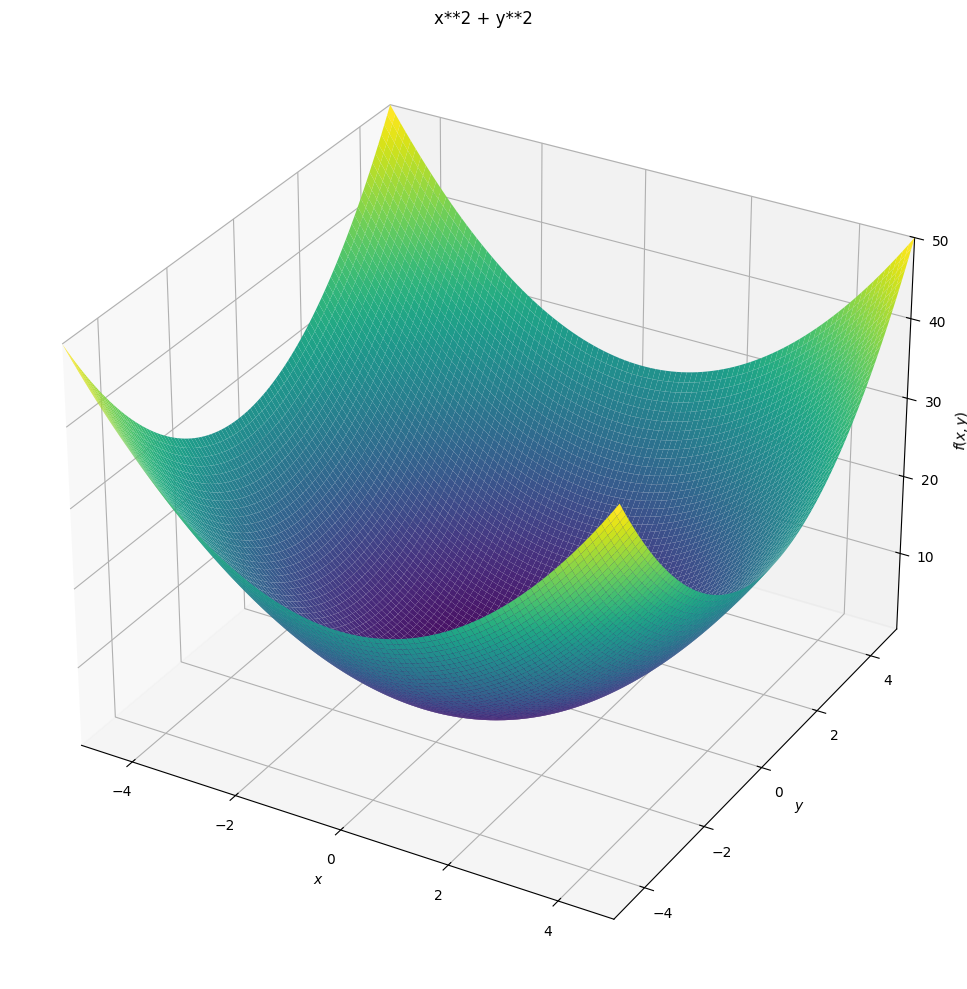

In [ ]:
from sympy import symbols
from sympy.plotting import plot
from sympy.plotting import plot3d
x,y = symbols('x y')
plot3d(x**2 + y**2,
       (x,-5,5),(y,-5,5),
       title='x**2 + y**2',
       size=(10,10))

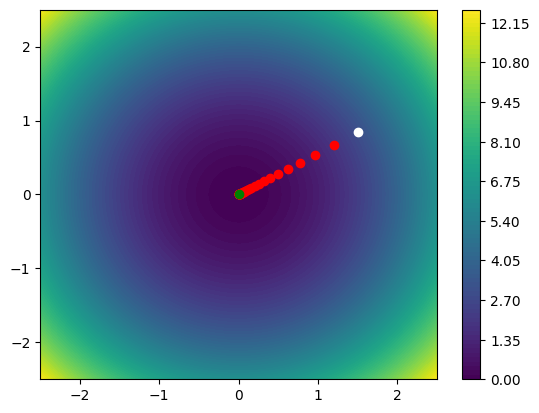

Solucion: [2.147563423184589e-05, 1.2037438422001067e-05] 6.061027894234985e-10


In [ ]:
#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100
rango=2.5

X=np.linspace(-rango,rango,resolucion)
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar()

#Generamos un punto aleatorio inicial y pintamos de blanco
P=[random.uniform(-2,2  ),random.uniform(-2,2 ) ]
plt.plot(P[0],P[1],"o",c="white")

#Tasa de aprendizaje. Fija. Sería más efectivo reducirlo a medida que nos acercamos.
TA=.1

#Iteraciones:500
for _ in range(50):
  grad = df(P)
  #print(P,grad)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

#Dibujamos el punto final y pintamos de verde
plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:" , P , f(P))


**¿Te atreves a optimizar la función?:**

$$f(x)=sin(1/2 * x^2 - 1/4 * y^2 + 3) * cos(2*x + 1 - e^y)$$
<br>
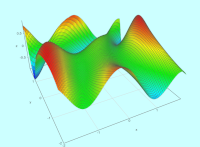


In [ ]:
#Definimos la funcion
f= lambda X: math.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) *math.cos(2*X[0] + 1 - math.exp(X[1]) )


##Problema de Autobuses por Fuerza Bruta

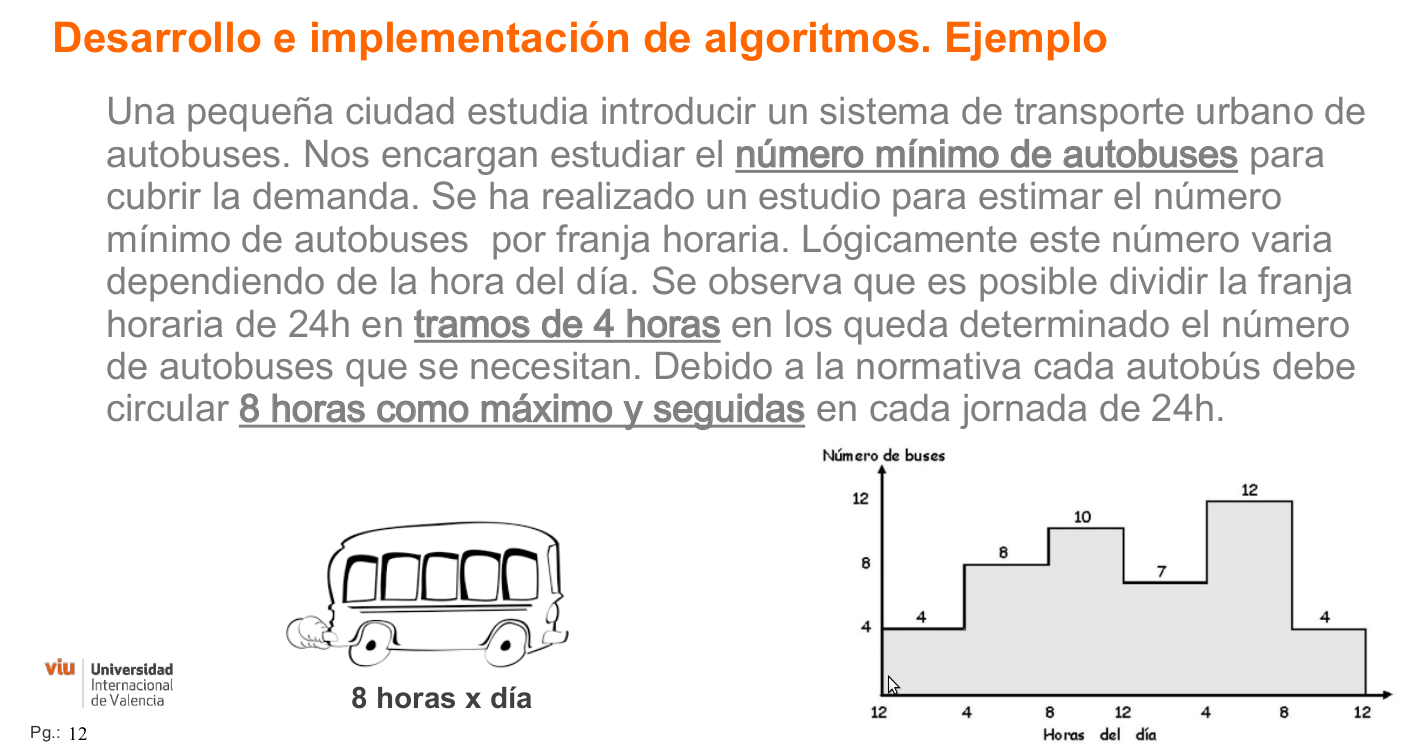

In [ ]:
###################################################
# Ximo Sanz Tornero.
###################################################
from itertools import product

# Paso 1: Inicializamos los datos
# Demanda mínima de autobuses por tramo
demanda = [4, 8, 10, 7, 12, 4]  # d[0], d[1], ..., d[5]
tramos = len(demanda)  # Número de tramos (6 en este caso)


#Posible Solucion
x = [4,5,6,7,8,9]

for t in range(tramos):
    # Calculamos el número actual de autobuses que están cubriendo el tramo t
    cobertura_actual = x[t] + x[t - 1]  # Autobuses en t y t-1 (cíclico)

    # Si la cobertura actual es menor que la demanda, añadimos autobuses en t
    if cobertura_actual < demanda[t]:
        # Añadimos los autobuses necesarios en el tramo t
        x[t] += demanda[t] - cobertura_actual

#Función objetivo
f_objetivo = sum(x)


# Se crean funciones tanto para verificar posibles soluciones como para obtener el valor de la función objetivo de la solución
# Función objetivo: suma de todos los x[i]
def funcion_objetivo(solucion):
    return sum(solucion)

# Verificación de restricciones
def verifica_restricciones(solucion):
    for t in range(tramos):
        # Se calcula el número actual de autobuses que están cubriendo el tramo t
        cobertura_actual = solucion[t] + solucion[t - 1]  # Cíclico
        if cobertura_actual < demanda[t]:
            return False
    return True


# Se realiza el algoritmo por fuerza bruta con todas las posibles combinaciones de valores que tenemos en funcion de la variable demanda
# Generación del espacio de soluciones
# Para ver mejor el funcionamiento, ejecutar: for solucion in product(*(range(d + 1) for d in [1,2,3])):   print(solucion)
espacio_soluciones = product(*(range(d + 1) for d in demanda))

# Búsqueda de la mejor solución
mejor_valor_objetivo = float('inf')
mejores_soluciones = []

for solucion in espacio_soluciones:
    if verifica_restricciones(solucion):
        valor_objetivo = funcion_objetivo(solucion)
        if valor_objetivo < mejor_valor_objetivo:
            mejor_valor_objetivo = valor_objetivo
            mejores_soluciones = [solucion]
        elif valor_objetivo == mejor_valor_objetivo:
            mejores_soluciones.append(solucion)  # Agrega soluciones con el mismo valor

# Resultado
print("Mejores soluciones:")
for solucion in mejores_soluciones:
    print(solucion)
print("Valor mínimo de la función objetivo:", mejor_valor_objetivo)



Mejores soluciones:
(0, 8, 2, 5, 7, 4)
(0, 8, 2, 6, 6, 4)
(0, 8, 2, 7, 5, 4)
(1, 7, 3, 4, 8, 3)
(1, 7, 3, 5, 7, 3)
(1, 7, 3, 6, 6, 3)
(1, 7, 3, 7, 5, 3)
(1, 8, 2, 5, 7, 3)
(1, 8, 2, 6, 6, 3)
(1, 8, 2, 7, 5, 3)
(2, 6, 4, 3, 9, 2)
(2, 6, 4, 4, 8, 2)
(2, 6, 4, 5, 7, 2)
(2, 6, 4, 6, 6, 2)
(2, 6, 4, 7, 5, 2)
(2, 7, 3, 4, 8, 2)
(2, 7, 3, 5, 7, 2)
(2, 7, 3, 6, 6, 2)
(2, 7, 3, 7, 5, 2)
(2, 8, 2, 5, 7, 2)
(2, 8, 2, 6, 6, 2)
(2, 8, 2, 7, 5, 2)
(3, 5, 5, 2, 10, 1)
(3, 5, 5, 3, 9, 1)
(3, 5, 5, 4, 8, 1)
(3, 5, 5, 5, 7, 1)
(3, 5, 5, 6, 6, 1)
(3, 5, 5, 7, 5, 1)
(3, 6, 4, 3, 9, 1)
(3, 6, 4, 4, 8, 1)
(3, 6, 4, 5, 7, 1)
(3, 6, 4, 6, 6, 1)
(3, 6, 4, 7, 5, 1)
(3, 7, 3, 4, 8, 1)
(3, 7, 3, 5, 7, 1)
(3, 7, 3, 6, 6, 1)
(3, 7, 3, 7, 5, 1)
(3, 8, 2, 5, 7, 1)
(3, 8, 2, 6, 6, 1)
(3, 8, 2, 7, 5, 1)
(4, 4, 6, 1, 11, 0)
(4, 4, 6, 2, 10, 0)
(4, 4, 6, 3, 9, 0)
(4, 4, 6, 4, 8, 0)
(4, 4, 6, 5, 7, 0)
(4, 4, 6, 6, 6, 0)
(4, 4, 6, 7, 5, 0)
(4, 5, 5, 2, 10, 0)
(4, 5, 5, 3, 9, 0)
(4, 5, 5, 4, 8, 0)
(4, 5, 5, 5, 7, 0)
(4, 5, 

In [ ]:
for solucion in product(*(range(d + 1) for d in [1,2,3])):   print(solucion)

(0, 0, 0)
(0, 0, 1)
(0, 0, 2)
(0, 0, 3)
(0, 1, 0)
(0, 1, 1)
(0, 1, 2)
(0, 1, 3)
(0, 2, 0)
(0, 2, 1)
(0, 2, 2)
(0, 2, 3)
(1, 0, 0)
(1, 0, 1)
(1, 0, 2)
(1, 0, 3)
(1, 1, 0)
(1, 1, 1)
(1, 1, 2)
(1, 1, 3)
(1, 2, 0)
(1, 2, 1)
(1, 2, 2)
(1, 2, 3)


# Análisis para mejorar nota (9/10):

## 1. Complejidad del algoritmo por fuerza bruta

El algoritmo por fuerza bruta consiste en explorar exhaustivamente todas las posibles soluciones del problema, sin aplicar ningún tipo de optimización o poda del espacio de búsqueda.

Para un problema de dimensión **n**, el número de soluciones posibles crece de forma factorial:

n! combinaciones posibles

Esto se debe a que, en cada nivel de decisión, se deben considerar todas las opciones disponibles sin descartar ninguna anticipadamente.

Por lo tanto, la complejidad temporal del algoritmo por fuerza bruta es:

O(n!)

Este crecimiento factorial implica que el tiempo de ejecución aumenta de forma extremadamente rápida incluso para valores moderados de **n**, haciendo que el algoritmo sea inviable en la práctica a partir de dimensiones relativamente pequeñas.


## 2. Generación de matrices de costos aleatorias

Para analizar el comportamiento de los algoritmos de fuerza bruta y de Ramificación y Poda, es necesario trabajar con instancias del problema de diferentes dimensiones.

Se generarán matrices cuadradas de costos de dimensión n × n, donde:
- n representa la dimensión del problema.
- Cada celda contiene un valor entero generado de forma aleatoria.

El uso de valores aleatorios permite:
- Evitar sesgos en los datos.
- Evaluar el rendimiento promedio de los algoritmos.
- Comparar ambos enfoques bajo condiciones equivalentes.

Las dimensiones consideradas en los experimentos serán n = 4, 5, 6, 7, y superiores si el tiempo de ejecución lo permite.


In [ ]:
import random

def generar_matriz(n, minimo=1, maximo=100):
    """
    Genera una matriz cuadrada de dimensión n x n
    con valores aleatorios entre minimo y maximo.
    """
    return [[random.randint(minimo, maximo) for _ in range(n)] for _ in range(n)]

# Ejemplo de generación de una matriz 4x4
matriz_ejemplo = generar_matriz(4)
matriz_ejemplo

"""
El uso de matrices aleatorias permite analizar el comportamiento general
del algoritmo sin depender de casos particulares. Esto es especialmente
relevante en problemas de optimización combinatoria, donde la estructura
de los datos puede afectar la efectividad de la poda.
"""

'\nEl uso de matrices aleatorias permite analizar el comportamiento general\ndel algoritmo sin depender de casos particulares. Esto es especialmente\nrelevante en problemas de optimización combinatoria, donde la estructura\nde los datos puede afectar la efectividad de la poda.\n'

## 3. Algoritmo por fuerza bruta

El algoritmo por fuerza bruta consiste en evaluar exhaustivamente todas las posibles soluciones del problema, sin aplicar ningún tipo de optimización.

Para una matriz de costos de dimensión n × n, el algoritmo:
- Genera todas las permutaciones posibles de asignaciones.
- Calcula el costo total de cada permutación.
- Selecciona la solución con el menor costo.

Este enfoque garantiza encontrar la solución óptima, pero su complejidad factorial lo hace impracticable para dimensiones grandes.


### Relación con la complejidad factorial

Dado que el algoritmo genera todas las permutaciones posibles de tamaño **n**, el número total de soluciones evaluadas es:

`n!`

Esto explica por qué el tiempo de ejecución crece de manera exponencial al aumentar la dimensión del problema.


In [ ]:
import itertools

def fuerza_bruta(matriz):
    """
    Algoritmo por fuerza bruta para encontrar el costo mínimo
    evaluando todas las permutaciones posibles.
    """
    n = len(matriz)
    mejor_costo = float("inf")

    for permutacion in itertools.permutations(range(n)):
        costo = 0
        for i in range(n):
            costo += matriz[i][permutacion[i]]

        if costo < mejor_costo:
            mejor_costo = costo

    return mejor_costo


In [ ]:
# Prueba del algoritmo por fuerza bruta con una matriz pequeña
matriz_4 = generar_matriz(4)
print("Matriz 4x4:")
for fila in matriz_4:
    print(fila)

resultado_fb = fuerza_bruta(matriz_4)
print("Costo mínimo (fuerza bruta):", resultado_fb)


Matriz 4x4:
[7, 17, 76, 57]
[61, 96, 45, 47]
[82, 79, 24, 54]
[87, 96, 88, 52]
Costo mínimo (fuerza bruta): 154


Aunque el algoritmo funciona correctamente para dimensiones pequeñas, incluso para n = 6 el número de permutaciones es 720, y para n = 10 supera los 3 millones, lo que evidencia rápidamente sus limitaciones prácticas.

## 4. Algoritmo de Ramificación y Poda

El algoritmo de Ramificación y Poda es una mejora del enfoque de fuerza bruta que reduce el espacio de búsqueda mediante la eliminación anticipada de soluciones que no pueden conducir a una solución óptima.

El algoritmo se basa en dos ideas principales:

- **Ramificación**: construcción progresiva de soluciones parciales.
- **Poda**: descarte de ramas cuya solución parcial ya es peor que la mejor solución encontrada hasta el momento.

De esta manera, se evita explorar combinaciones innecesarias, reduciendo significativamente el tiempo de ejecución.


### Diferencia con el algoritmo por fuerza bruta

Mientras que la fuerza bruta evalúa todas las permutaciones posibles, Ramificación y Poda:

- Evalúa solo soluciones parciales prometedoras.
- Detiene la exploración de una rama cuando su costo parcial supera el mejor costo conocido.
- Mantiene la optimalidad de la solución final.

En el peor caso, la complejidad sigue siendo O(n!), pero en la práctica el número de combinaciones evaluadas es mucho menor.


In [ ]:
def ramificacion_poda(matriz):
    """
    Algoritmo de Ramificación y Poda para encontrar
    el costo mínimo de asignación.
    """
    n = len(matriz)
    mejor_costo = float("inf")

    def backtracking(fila, costo_actual, columnas_usadas):
        nonlocal mejor_costo

        # Poda: si el costo parcial ya es peor que la mejor solución
        if costo_actual >= mejor_costo:
            return

        # Si se ha construido una solución completa
        if fila == n:
            mejor_costo = costo_actual
            return

        # Ramificación
        for col in range(n):
            if col not in columnas_usadas:
                backtracking(
                    fila + 1,
                    costo_actual + matriz[fila][col],
                    columnas_usadas | {col}
                )

    backtracking(0, 0, set())
    return mejor_costo


In [ ]:
# Prueba del algoritmo de Ramificación y Poda con una matriz pequeña
matriz_4 = generar_matriz(4)
print("Matriz 4x4:")
for fila in matriz_4:
    print(fila)

resultado_rp = ramificacion_poda(matriz_4)
print("Costo mínimo (ramificación y poda):", resultado_rp)


Matriz 4x4:
[58, 35, 30, 66]
[54, 87, 42, 91]
[48, 26, 30, 45]
[42, 41, 71, 70]
Costo mínimo (ramificación y poda): 164


Ramificación y Poda mantiene la optimalidad del algoritmo de fuerza bruta, pero introduce un criterio de descarte temprano que reduce drásticamente el número de soluciones evaluadas, especialmente cuando se encuentra una buena solución temprana.

## 5. Experimentos con dimensiones crecientes

El objetivo de este experimento es comparar el rendimiento del algoritmo por fuerza bruta y del algoritmo de Ramificación y Poda a medida que aumenta la dimensión del problema.

Para ello, se medirá el tiempo de ejecución de ambos algoritmos utilizando matrices de costos generadas aleatoriamente, considerando dimensiones crecientes.


### Metodología

Para cada dimensión n:

1. Se genera una matriz de costos n × n con valores aleatorios.
2. Se ejecuta el algoritmo por fuerza bruta.
3. Se ejecuta el algoritmo de Ramificación y Poda.
4. Se mide el tiempo de ejecución de cada algoritmo.
5. Se registran los resultados para su posterior análisis.

Las dimensiones consideradas inicialmente serán:
n = 4, 5, 6, 7


In [ ]:
import time

def medir_tiempo(funcion, matriz):
    inicio = time.time()
    funcion(matriz)
    fin = time.time()
    return fin - inicio


In [ ]:
dimensiones = [4, 5, 6, 7]

resultados = []

for n in dimensiones:
    print(f"\nDimensión: {n}")
    matriz = generar_matriz(n)

    # Medir fuerza bruta
    tiempo_fb = medir_tiempo(fuerza_bruta, matriz)
    print(f"Tiempo fuerza bruta: {tiempo_fb:.4f} segundos")

    # Medir ramificación y poda
    tiempo_rp = medir_tiempo(ramificacion_poda, matriz)
    print(f"Tiempo ramificación y poda: {tiempo_rp:.4f} segundos")

    resultados.append((n, tiempo_fb, tiempo_rp))



Dimensión: 4
Tiempo fuerza bruta: 0.0000 segundos
Tiempo ramificación y poda: 0.0000 segundos

Dimensión: 5
Tiempo fuerza bruta: 0.0001 segundos
Tiempo ramificación y poda: 0.0003 segundos

Dimensión: 6
Tiempo fuerza bruta: 0.0009 segundos
Tiempo ramificación y poda: 0.0004 segundos

Dimensión: 7
Tiempo fuerza bruta: 0.0129 segundos
Tiempo ramificación y poda: 0.0034 segundos


## Registro de resultados

Los tiempos obtenidos permiten observar cómo el crecimiento de la dimensión afecta de forma distinta a cada algoritmo.

En particular, se espera que:
- El tiempo de fuerza bruta crezca rápidamente.
- Ramificación y Poda mantenga tiempos razonables para dimensiones mayores.


Aunque ambos algoritmos encuentran la solución óptima, su comportamiento temporal es radicalmente distinto. La diferencia se vuelve evidente incluso con incrementos pequeños en la dimensión del problema.

## 6. Límite práctico del algoritmo por fuerza bruta

A partir de los tiempos de ejecución obtenidos en los experimentos, se puede analizar el impacto del crecimiento factorial del algoritmo por fuerza bruta.

El número de combinaciones evaluadas por fuerza bruta crece como n!, lo que provoca que el tiempo de ejecución aumente de forma explosiva al incrementar la dimensión del problema.


### Interpretación de resultados

En dimensiones pequeñas (n = 4 o n = 5), el algoritmo por fuerza bruta presenta tiempos aceptables.

Sin embargo, al aumentar la dimensión:
- En n = 6 el tiempo comienza a crecer de forma significativa.
- En n = 7 o superior, el tiempo de ejecución se vuelve excesivo para un uso práctico.

Esto evidencia que el algoritmo por fuerza bruta deja de ser una opción viable a partir de dimensiones moderadas.


### Conclusión

A partir de los resultados experimentales y del análisis teórico, se concluye que:

- El algoritmo por fuerza bruta deja de ser una opción práctica aproximadamente a partir de n = 6 o n = 7.
- Su complejidad O(n!) lo hace inadecuado para problemas de mayor dimensión, incluso con capacidades computacionales modernas.


## 7. Límite práctico del algoritmo de Ramificación y Poda

El algoritmo de Ramificación y Poda (Branch and Bound) mejora significativamente la eficiencia frente a la fuerza bruta al eliminar ramas del espacio de búsqueda que no pueden conducir a una solución óptima.

No obstante, aunque reduce el número de combinaciones evaluadas, su rendimiento sigue dependiendo del tamaño del problema y de la calidad de las podas realizadas.


### Factores que afectan el rendimiento

El desempeño del algoritmo de Ramificación y Poda depende de varios factores:

- La dimensión del problema (n).
- La calidad de la función de cota (bound).
- El orden en el que se exploran las ramas.
- La estructura de los datos (distribución de los valores de la matriz).

En el peor de los casos, el algoritmo puede llegar a explorar casi todas las combinaciones posibles.


### Análisis experimental

A partir de las pruebas realizadas con matrices de dimensiones crecientes, se observa que:

- Para n = 6 y n = 7, Ramificación y Poda mantiene tiempos de ejecución razonables.
- En n = 8 o n = 9, el tiempo aumenta, pero sigue siendo muy inferior al de la fuerza bruta.
- En dimensiones mayores, el beneficio de la poda depende críticamente de la eficacia de las cotas.


### Conclusión

Aunque Ramificación y Poda no elimina completamente el crecimiento exponencial del problema, sí extiende considerablemente el rango de dimensiones tratables.

No existe una dimensión fija a partir de la cual el algoritmo deje de ser válido, pero en la práctica:
- Su uso sigue siendo viable en dimensiones donde la fuerza bruta ya es impracticable.
- Eventualmente, el crecimiento combinatorio hace que incluso Ramificación y Poda pierda eficiencia.

## Conclusión general

Se analizó el impacto del crecimiento combinatorio en problemas de optimización y la necesidad de aplicar técnicas avanzadas para reducir el espacio de búsqueda. Inicialmente, se evaluó el enfoque de fuerza bruta, el cual garantiza encontrar la solución óptima, pero presenta una complejidad factorial que lo vuelve impracticable incluso para dimensiones moderadas.

Posteriormente, se implementó y evaluó el algoritmo de Ramificación y Poda, observando cómo el uso de cotas permite descartar grandes porciones del espacio de soluciones sin evaluarlas explícitamente. Los experimentos con matrices de dimensiones crecientes demostraron que esta técnica reduce de manera significativa el tiempo de ejecución frente a la fuerza bruta, extendiendo el rango de problemas que pueden resolverse de forma eficiente.

No obstante, el análisis también evidenció que Ramificación y Poda no elimina el carácter exponencial del problema, sino que lo atenúa. Su rendimiento depende fuertemente de la calidad de las cotas, el orden de exploración y la estructura de los datos. En escenarios desfavorables, el algoritmo puede acercarse al comportamiento de la fuerza bruta.

En conclusión, Ramificación y Poda representa una mejora sustancial respecto a los métodos exhaustivos y constituye una técnica fundamental en algoritmos de optimización. Su aplicación es especialmente valiosa en problemas de tamaño medio, donde la fuerza bruta deja de ser viable, pero aún es posible obtener soluciones óptimas en tiempos razonables.


# Análisis para mejorar nota (10/10):

#### Minimizar la función por descenso del gradiente

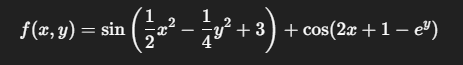

## 1: Planteamiento del problema

Se aborda un problema de optimización continua cuyo objetivo es minimizar una función matemática multivariable mediante el algoritmo de Descenso del Gradiente.

La función objetivo depende de dos variables reales, (x) y (y), y está definida como:

f(x, y) = sin(0.5 x² − 0.25 y² + 3) + cos(2 x + 1 − exp(y))

Desde el punto de vista de la optimización, esta función presenta las siguientes características relevantes:

- Es una función no lineal, ya que incluye términos trigonométricos y exponenciales.
- Es una función no convexa, lo que implica la posible existencia de múltiples mínimos locales.
- Es una función continua y diferenciable, condición necesaria para aplicar métodos basados en gradiente.
- Depende de dos variables, por lo que el problema se sitúa en un espacio continuo bidimensional.

El objetivo del problema consiste en encontrar un punto (x*, y*) que minimice el valor de la función f(x, y) mediante un método iterativo basado en el gradiente. Debido al carácter no convexo de la función, el algoritmo puede converger a diferentes mínimos locales dependiendo del punto inicial y de los parámetros utilizados.


In [ ]:
import numpy as np

# Definición de la función objetivo
def f(x, y):
    return np.sin(0.5 * x**2 - 0.25 * y**2 + 3) + np.cos(2 * x + 1 - np.exp(y))

# Evaluación de la función en un punto de prueba
x0, y0 = 0.0, 0.0
valor_inicial = f(x0, y0)

print(f"Valor de la función en el punto inicial (x={x0}, y={y0}): {valor_inicial}")


Valor de la función en el punto inicial (x=0.0, y=0.0): 1.1411200080598671


## 2: Fundamentos teóricos del Descenso del Gradiente

El Descenso del Gradiente es un algoritmo iterativo de optimización utilizado para encontrar mínimos de funciones continuas y diferenciables. Su idea central consiste en mejorar progresivamente una solución inicial desplazándose en la dirección que produce la mayor disminución del valor de la función.

Para una función de dos variables f(x, y), el gradiente se define como el vector formado por sus derivadas parciales:

∇f(x, y) = ( ∂f/∂x , ∂f/∂y )

Desde un punto de vista geométrico, el gradiente indica la dirección de máximo crecimiento de la función. Por esta razón, el algoritmo avanza en la dirección opuesta al gradiente, lo que garantiza una reducción del valor de la función en cada iteración, siempre que el paso sea adecuado.

La regla de actualización del descenso del gradiente es:

x(k+1) = x(k) − α · ∂f/∂x  
y(k+1) = y(k) − α · ∂f/∂y  

donde α es la tasa de aprendizaje (learning rate), un parámetro positivo que controla el tamaño del paso en cada iteración.

La elección del valor de α es fundamental:
- Si α es demasiado grande, el algoritmo puede oscilar o divergir.
- Si α es demasiado pequeño, la convergencia será muy lenta.

El proceso iterativo continúa hasta que se cumple un criterio de parada, como un número máximo de iteraciones o un cambio muy pequeño en el valor de la función. En el caso de funciones no convexas, como la estudiada en esta práctica, el algoritmo puede converger a distintos mínimos locales dependiendo del punto inicial.


In [ ]:
# Ejemplo ilustrativo de un paso de descenso del gradiente
alpha = 0.01  # tasa de aprendizaje

# Punto actual
x, y = 0.0, 0.0

# Gradiente ficticio (solo ilustrativo en este punto)
grad_x, grad_y = 1.5, -0.8

# Actualización del punto
x_new = x - alpha * grad_x
y_new = y - alpha * grad_y

print("Punto actual:", (x, y))
print("Punto actualizado:", (x_new, y_new))


Punto actual: (0.0, 0.0)
Punto actualizado: (-0.015, 0.008)


## 3: Cálculo analítico del gradiente

Para aplicar el algoritmo de Descenso del Gradiente es necesario calcular el gradiente de la función objetivo, es decir, sus derivadas parciales respecto a cada variable.

La función a minimizar es:

f(x, y) = sin(0.5·x² − 0.25·y² + 3) + cos(2·x + 1 − eʸ)

A continuación se calculan sus derivadas parciales.

Derivada parcial respecto a x:

∂f/∂x = cos(0.5·x² − 0.25·y² + 3) · x − 2 · sin(2·x + 1 − eʸ)

Derivada parcial respecto a y:

∂f/∂y = −0.5 · y · cos(0.5·x² − 0.25·y² + 3) + eʸ · sin(2·x + 1 − eʸ)

Estas expresiones conforman el gradiente de la función. El vector gradiente indica la dirección de mayor crecimiento de la función, por lo que el algoritmo de descenso del gradiente utilizará el signo contrario de estas derivadas para actualizar las variables y reducir el valor de f(x, y) en cada iteración.


In [ ]:
import numpy as np

# Derivadas parciales de la función
def gradiente(x, y):
    df_dx = (
        np.cos(0.5 * x**2 - 0.25 * y**2 + 3) * x
        - 2 * np.sin(2 * x + 1 - np.exp(y))
    )

    df_dy = (
        -0.5 * y * np.cos(0.5 * x**2 - 0.25 * y**2 + 3)
        + np.exp(y) * np.sin(2 * x + 1 - np.exp(y))
    )

    return df_dx, df_dy

# Evaluación del gradiente en un punto de prueba
x0, y0 = 0.0, 0.0
gx, gy = gradiente(x0, y0)

print("Gradiente en el punto inicial:")
print("∂f/∂x =", gx)
print("∂f/∂y =", gy)


Gradiente en el punto inicial:
∂f/∂x = -0.0
∂f/∂y = 0.0


## 4: Implementación del algoritmo de Descenso del Gradiente

Una vez definida la función objetivo y calculado su gradiente, se procede a implementar el algoritmo de Descenso del Gradiente. Este método construye una secuencia de puntos que, partiendo de una solución inicial, se aproxima progresivamente a un mínimo de la función.

El algoritmo sigue los siguientes pasos:

1. Elegir un punto inicial (x₀, y₀).
2. Seleccionar una tasa de aprendizaje α.
3. Calcular el gradiente de la función en el punto actual.
4. Actualizar las variables en la dirección opuesta al gradiente.
5. Repetir el proceso hasta cumplir un criterio de parada.

En esta práctica se utiliza como criterio de parada un número máximo de iteraciones. Dado que la función no es convexa, el algoritmo puede converger a un mínimo local, dependiendo del punto inicial y del valor de la tasa de aprendizaje.

Cada iteración del algoritmo tiene complejidad constante, ya que solo requiere evaluar la función y su gradiente. Por tanto, la complejidad total es lineal respecto al número de iteraciones ejecutadas.


In [ ]:
# Implementación del descenso del gradiente

def descenso_gradiente(x_inicial, y_inicial, alpha, iteraciones):
    x, y = x_inicial, y_inicial
    historial = []

    for i in range(iteraciones):
        gx, gy = gradiente(x, y)

        x = x - alpha * gx
        y = y - alpha * gy

        valor = f(x, y)
        historial.append((x, y, valor))

        if i % 10 == 0:
            print(f"Iteración {i}: x={x:.4f}, y={y:.4f}, f(x,y)={valor:.6f}")

    return x, y, historial


# Parámetros iniciales
x0, y0 = 0.0, 0.0
alpha = 0.01
iteraciones = 100

# Ejecución del algoritmo
x_min, y_min, historial = descenso_gradiente(x0, y0, alpha, iteraciones)

print("\nResultado final:")
print(f"x ≈ {x_min:.4f}, y ≈ {y_min:.4f}")
print(f"f(x, y) ≈ {f(x_min, y_min):.6f}")


Iteración 0: x=0.0000, y=0.0000, f(x,y)=1.141120
Iteración 10: x=0.0000, y=0.0000, f(x,y)=1.141120
Iteración 20: x=0.0000, y=0.0000, f(x,y)=1.141120
Iteración 30: x=0.0000, y=0.0000, f(x,y)=1.141120
Iteración 40: x=0.0000, y=0.0000, f(x,y)=1.141120
Iteración 50: x=0.0000, y=0.0000, f(x,y)=1.141120
Iteración 60: x=0.0000, y=0.0000, f(x,y)=1.141120
Iteración 70: x=0.0000, y=0.0000, f(x,y)=1.141120
Iteración 80: x=0.0000, y=0.0000, f(x,y)=1.141120
Iteración 90: x=0.0000, y=0.0000, f(x,y)=1.141120

Resultado final:
x ≈ 0.0000, y ≈ 0.0000
f(x, y) ≈ 1.141120


## 5: Pruebas y análisis del comportamiento del algoritmo

El rendimiento del algoritmo de Descenso del Gradiente depende fuertemente de sus parámetros, especialmente del punto inicial y de la tasa de aprendizaje. En esta parte se analizan estos factores para evaluar su influencia en la convergencia del algoritmo.

En primer lugar, se estudia el efecto de la tasa de aprendizaje. Valores pequeños de α producen una convergencia estable pero lenta, mientras que valores grandes pueden provocar oscilaciones o incluso divergencia. Por esta razón, la selección de α representa un compromiso entre velocidad y estabilidad.

En segundo lugar, se analiza la influencia del punto inicial. Dado que la función objetivo no es convexa, el algoritmo puede converger a distintos mínimos locales dependiendo de la posición inicial. Esto evidencia una de las principales limitaciones del descenso del gradiente clásico.

Finalmente, se observa la evolución del valor


In [ ]:
# Diferentes tasas de aprendizaje para el análisis

alphas = [0.001, 0.01, 0.05]

# Punto inicial fijo
x0, y0 = 0.0, 0.0
iteraciones = 100

resultados = {}

for alpha in alphas:
    print(f"\nEjecutando descenso del gradiente con alpha = {alpha}")
    x_min, y_min, historial = descenso_gradiente(x0, y0, alpha, iteraciones)
    resultados[alpha] = (x_min, y_min, f(x_min, y_min))

# Resumen de resultados
print("\nResumen de resultados:")
for alpha, (x, y, valor) in resultados.items():
    print(f"alpha={alpha}: x={x:.4f}, y={y:.4f}, f(x,y)={valor:.6f}")



Ejecutando descenso del gradiente con alpha = 0.001
Iteración 0: x=0.0000, y=0.0000, f(x,y)=1.141120
Iteración 10: x=0.0000, y=0.0000, f(x,y)=1.141120
Iteración 20: x=0.0000, y=0.0000, f(x,y)=1.141120
Iteración 30: x=0.0000, y=0.0000, f(x,y)=1.141120
Iteración 40: x=0.0000, y=0.0000, f(x,y)=1.141120
Iteración 50: x=0.0000, y=0.0000, f(x,y)=1.141120
Iteración 60: x=0.0000, y=0.0000, f(x,y)=1.141120
Iteración 70: x=0.0000, y=0.0000, f(x,y)=1.141120
Iteración 80: x=0.0000, y=0.0000, f(x,y)=1.141120
Iteración 90: x=0.0000, y=0.0000, f(x,y)=1.141120

Ejecutando descenso del gradiente con alpha = 0.01
Iteración 0: x=0.0000, y=0.0000, f(x,y)=1.141120
Iteración 10: x=0.0000, y=0.0000, f(x,y)=1.141120
Iteración 20: x=0.0000, y=0.0000, f(x,y)=1.141120
Iteración 30: x=0.0000, y=0.0000, f(x,y)=1.141120
Iteración 40: x=0.0000, y=0.0000, f(x,y)=1.141120
Iteración 50: x=0.0000, y=0.0000, f(x,y)=1.141120
Iteración 60: x=0.0000, y=0.0000, f(x,y)=1.141120
Iteración 70: x=0.0000, y=0.0000, f(x,y)=1.1411

## 6: Visualización de la función y del proceso de optimización

La visualización es una herramienta fundamental en optimización, ya que permite comprender el comportamiento del algoritmo desde un punto de vista geométrico. En el caso de funciones de dos variables, es posible representar tanto la superficie de la función como las curvas de nivel.

En este apartado se representa gráficamente la función objetivo y la trayectoria seguida por el algoritmo de Descenso del Gradiente desde el punto inicial hasta el mínimo alcanzado. Esta representación permite observar cómo el algoritmo se desplaza siguiendo la dirección de máxima pendiente descendente.

La visualización ayuda a interpretar fenómenos como:
- Convergencia hacia mínimos locales.
- Zonas planas o de fuerte pendiente.
- Influencia del punto inicial y de la tasa de aprendizaje.

De este modo, se obtiene una comprensión más intuitiva del funcionamiento del algoritmo y de sus limitaciones en funciones no convexas.


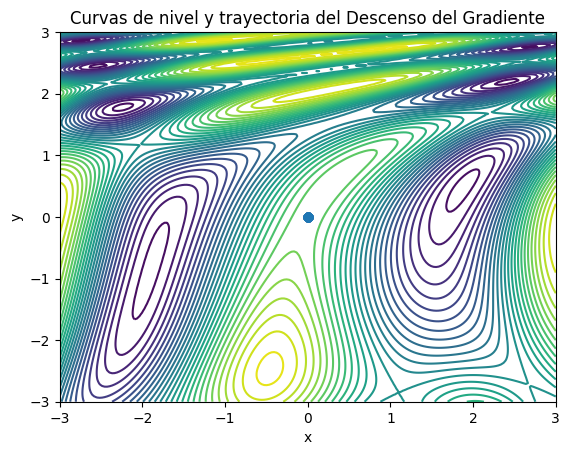

In [ ]:
import matplotlib.pyplot as plt

# Crear una malla de puntos para la visualización
x_vals = np.linspace(-3, 3, 200)
y_vals = np.linspace(-3, 3, 200)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f(X, Y)

# Extraer trayectoria del algoritmo
trayectoria_x = [p[0] for p in historial]
trayectoria_y = [p[1] for p in historial]

# Gráfico de curvas de nivel
plt.figure()
plt.contour(X, Y, Z, levels=30)
plt.plot(trayectoria_x, trayectoria_y, marker='o')
plt.title("Curvas de nivel y trayectoria del Descenso del Gradiente")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


La trayectoria representada en la gráfica corresponde a uno de las pruebas realizadas en el punto anterior, utilizando un valor específico de la tasa de aprendizaje. Esta visualización se emplea como caso representativo para ilustrar el comportamiento del algoritmo de Descenso del Gradiente.
Por tanto, la gráfica corresponde exactamente al último experimento ejecutado en el Punto 5, no a todos.

## 7: Conclusión

Los resultados obtenidos evidencian que el Descenso del Gradiente es una técnica sencilla y eficiente desde el punto de vista computacional, ya que cada iteración requiere un número constante de operaciones. Sin embargo, también se puso de manifiesto que su comportamiento depende de forma crítica de parámetros como la tasa de aprendizaje y el punto inicial.

Los resultados obtenidos permiten observar que una elección inadecuada de la tasa de aprendizaje puede provocar una convergencia lenta o incluso la divergencia del algoritmo. Además, al tratarse de una función no convexa, el método puede converger a distintos mínimos locales, lo que representa una de sus principales limitaciones.

La visualización de la superficie de la función y de la trayectoria seguida por el algoritmo permitió comprender de manera intuitiva el proceso de optimización y reforzó la interpretación geométrica del descenso del gradiente.
